# Выбор параметров модели и кросс-валидация
Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

Есть несколько подходов к выбору моделей:

1. **Использовать статистические критерии** (AIC, BIC, Adj. R2);
2. **Использовать методы ресемплинга**, которые позволяют оценить прогнозную модель, используя обучающий набор данных. Подобное оценивание выполняется для того, чтобы настроить параметры модели и выяснить ее реальные возможности без участия тестового набора данных.
    2. **Отложенная выборка (held-out/hold-out set)**. При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке. → После выбора оптимальных параметров можно построить финальную модель на полной обучающей выборке.

        * Проблема 1: Приходится слишком много объектов оставлять в контрольной подвыборке. Уменьшение длины обучающей подвыборки приводит к смещённой (пессимистически завышенной) оценке вероятности ошибки.

        * Проблема 2: Оценка существенно зависит от разбиения, тогда как желательно, чтобы она характеризовала только алгоритм обучения.

        * Проблема 3: Оценка имеет высокую дисперсию, которая может быть уменьшена путём усреднения по разбиениям.

    3. [**Кросс-валидация**](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B8%D0%B9_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C) (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация. Делим обучающую выборку на K равных частей. → Для каждой k-части обучаем модель на оставшихся K‐1 частях и оцениваем ошибку на k‐й части. → Финальный размер ошибки – усреднение ошибок для валидационных частей.

<img src="img/cv.png" width="500">

    k можно выбирать от 2 до n (размера обучающей выборки).

    Если k = n, подход называется leave-one-out CV (LOOCV), когда оценка ошибки происходит на одном наблюдении.

        * Чем меньше k, тем меньше дисперсия ошибки
        * Чем больше k, тем меньше смещение ошибки
        * Чем больше k, тем больше моделей обучаем (дорого)
    
   4. **Бутстреп**. Из существующей обучающей выборки размера n случайно выбираем с замещением n наблюдений – выборка бутстрепа. Часть наблюдений повторяется, часть наблюдений не входит (примерно, 1/3). → Обучаем модель на бутстрепнутой выборке. → Оцениваем модель на не вошедших наблюдениях. Повторяем много раз
   
### Кросс-валидация в sklearn
http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/classes.html#module-sklearn.cross_validation

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

diabetes = datasets.load_boston()
X = diabetes.data
y = diabetes.target

In [155]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, 1, 30)


tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)

clf.best_params_


{'alpha': 0.18873918221350977}

In [193]:
clf.grid_scores_

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -1.55947, std: 3.00592, params: {'alpha': 0.0001},
 mean: -1.55419, std: 2.99857, params: {'alpha': 0.00014873521072935117},
 mean: -1.54634, std: 2.98765, params: {'alpha': 0.00022122162910704501},
 mean: -1.53469, std: 2.97145, params: {'alpha': 0.00032903445623126676},
 mean: -1.51743, std: 2.94744, params: {'alpha': 0.00048939009184774938},
 mean: -1.49190, std: 2.91192, params: {'alpha': 0.00072789538439831537},
 mean: -1.45429, std: 2.85959, params: {'alpha': 0.0010826367338740541},
 mean: -1.39905, std: 2.78274, params: {'alpha': 0.0016102620275609393},
 mean: -1.31853, std: 2.67070, params: {'alpha': 0.002395026619987486},
 mean: -1.20226, std: 2.50899, params: {'alpha': 0.0035622478902624442},
 mean: -1.03717, std: 2.27940, params: {'alpha': 0.005298316906283713},
 mean: -0.80895, std: 1.96213, params: {'alpha': 0.0078804628156699131},
 mean: -0.50783, std: 1.54377, params: {'alpha': 0.011721022975334805},
 mean: -0.15007, std: 1.04757, params: {'alpha': 0.0174332882219

Выбирается тот параметр, который даёт наименьшую ошибку [перекрёстного контроля](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B8%D0%B9_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C). [Для классификации метрика по умолчанию — accuracy, для регрессии — коэффициент детерминации](http://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric). Можно задавать свой набор метрик.

# Регрессия: практика
Основываясь на материалах предыдущей пары, найдите наилучшую модель с наилучшими параметрами, предсказывающую цену на недвижимость.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Классификация
==========
Классификация – отнесение объекта к одной из категорий на основании его признаков.

* https://habrahabr.ru/company/ods/blog/328372/
* http://contrib.scikit-learn.org/imbalanced-learn/stable/
* https://habrahabr.ru/company/ods/blog/323890/#lineynyy-klassifikator
* https://www.kaggle.com/wiki/Metrics
* https://habrahabr.ru/company/io/blog/265007/
* https://habrahabr.ru/post/105220/

## Метрики качества классификаторов
Наиболее очевидной мерой качества в задаче классификации является доля правильных ответов (accuracy). Данная матрика имеет существенный недостаток — её значение необходимо оценивать в контексте баланса классов. Eсли в выборке 950 отрицательных и 50 по- ложительных объектов, то при абсолютно случайной классификации мы получим долю правильных ответов 0.95. Это означает, что доля положительных ответов сама по себе не несет никакой информации о качестве работы алгоритма a(x), и вместе с ней следует анализировать соотношение классов в выборке.

Также полезно вместе с долей правильных ответов вычислять базовую долю — долю правильных ответов алгоритма, всегда выдающего наиболее мощный класс.

Отметим, что при сравнении различных методов машинного обучения принято сообщать относительное уменьшение ошибки. Рассмотрим два алгоритма $a_1$ и $a_2$ с долями правильных ответов $r_1$ и $r_2$ соответственно, причем $r_2$ > $r_1$. Относительным уменьшением ошибки алгоритма $a_2$ называется величина:
$$\frac{(1-r_1)-(1-r_2)}{1-r_1}$$

Если доля ошибок была улучшена с $20\%$ до $10\%$, то относительное улучшение составляет $50\%$. Если доля ошибок была улучшена с $50\%$ до $25\%$, то относительное улучшение также равно $50\%$, хотя данный прирост кажется более существенным. Если же доля ошибок была улучшена с $0.1\%$ до $0.01\%$, то относительное улучшение составляет $90\%$.

### Матрица ошибок (Confusion matrix)
Матрица ошибок — это способ разбить объекты на четыре категории в зависимости от комбинации истинного ответа и ответа алгоритма.

Основные термины:
* $TP$ — истино-положительное решение;
* $TN$ — истино-отрицательное решение;
* $FP$ — ложно-положительное решение (Ошибка первого рода);
* $FN$ — ложно-отрицательное решение (Ошибка второго рода).

![](img/confusion_matrix.png)

<a href="img/DiagnosticTesting_Diagram.svg" target="_blank">Интерактивная картинка с большим числом метрик</a>


Accuracy — доля правильных ответов:

$${\displaystyle \mathrm {Accuracy} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}$$

Гораздо более информативными критериями являются [точность (precision) и полнота (recall)](https://en.wikipedia.org/wiki/Precision_and_recall).

Точность показывает, какая доля объектов, выделенных классификатором как положительные, действительно является положительными:
$$Precision = \frac{TP}{TP+FP}$$

Полнота показывает, какая часть положительных объектов была выделена классификатором:
$$Recall = \frac{TP}{TP+FN}$$
<img src="img/precisionrecall.png" width="300">

> Рассмотрим, например, задачу предсказания реакции клиента банка на звонок с предложением кредита. Если классификатор имеет высокую точность, то практически все клиенты, которым будет сделано предложение, откликнутся на него. Если классификатор имеет высокую полноту, то предложение будет сделано практически всем клиентам, которые готовы откликнуться на него.

Отметим, что точность и полнота не зависят от соотношения размеров классов. Даже если объектов положительного класса на порядки меньше, чем объектов отрицательного класса, данные показатели будут корректно отражать качество работы алгоритма.

Существует несколько способов получить один критерий качества на основе точности и полноты. Один из них — F-мера, гармоническое среднее точности и полноты:
$$
F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} = \frac {(1 + \beta^2) \cdot \mathrm{true\ positive} }{(1 + \beta^2) \cdot \mathrm{true\ positive} + \beta^2 \cdot \mathrm{false\ negative} + \mathrm{false\ positive}}$$

Среднее гармоническое обладает важным свойством — оно близко к нулю, если хотя бы один из аргументов близок к нулю. Именно поэтому оно является более предпочтительным, чем среднее арифметическое (если алгоритм будет относить все объекты к положительному классу, то он будет иметь recall = 1 и precision больше 0, а их среднее арифметическое будет больше 1/2, что недопустимо).

Чаще всего берут $\beta=1$, хотя иногда встречаются и другие модификации. $F_2$ острее реагирует на recall (т. е. на долю ложноположительных ответов), а $F_{0.5}$ чувствительнее к точности (ослабляет влияние ложноположительных ответов).

В sklearn есть удобная функция [sklearn.metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

In [14]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



### AUC-ROC
Кривая ошибок или ROC-кривая – графичекая характеристика качества бинарного классификатора, зависимость доли верных положительных классификаций от доли ложных положительных классификаций при варьировании порога решающего правила. Преимуществом ROC-кривой является её инвариантность относительно отношения цены ошибки I и II рода.

При конвертации вещественного ответа алгоритма (как правило, вероятности принадлежности к классу, отдельно см. SVM) в бинарную метку, мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):

$$\large TPR = \frac{TP}{TP + FN}$$

$$\large FPR = \frac{FP}{FP + TN}$$

True positive rate (TPR, sensitivity, recall, probability of detection) — показывает, какую долю из объектов positive класса алгоритм предсказал верно.

False positive rate (FPR) показывает, какую долю из объектов negative класса алгоритм предсказал неверно.


True negative rate (TNR, specificity) — показывает, какую долю из объектов negative класса алгоритм предсказал верно.

<img src="img/auc.png" width="50%" title="Пример ROC кривой">

В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.

Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

Критерий AUC-ROC более устойчив к несбалансированным классам и может быть интерпретирован как вероятность того, что случайно выбранный positive объект будет проранжирован классификатором выше (будет иметь более высокую вероятность быть positive), чем случайно выбранный negative объект.

Однако, баланс классов все равно важен. Рассмотрим задачу выделения математических статей из множества научных статей. Допустим, что всего имеет-ся 1.000.100 статей, из которых лишь 100 относятся к математике. Если нам удастся построить алгоритм, идеально решающий задачу, то его TPR будет равен еди- нице, а FPR — нулю. Рассмотрим теперь плохой алгоритм, дающий положительный ответ на 95 математических и 50.000 нематематических статьях. Такой алгоритм совершенно бесполезен, но при этом имеет TPR = 0.95 и FPR = 0.05, что крайне близко к показателям идеального алгоритма. Таким образом, если положительный класс существенно меньше по размеру, то AUC-ROC может давать неадекватную оценку качества работы алгоритма, поскольку измеряет долю неверно принятых объектов относительно общего числа отрицательных.

В таким случаях можно использовать AUC-PR — площадь под кривой, простроенной в системе координат $y=precision$ и $x=recall$ [pdf](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf).

### Индекс Джини.

В задачах кредитного скоринга вместо AUC-ROC часто используется пропорциональная метрика, называемая индексом Джини (Gini index): $$\large Gini = 2AUC − 1.$$

По сути это площадь между ROC-кривой и диагональю соединяющей точки (0,0) и (1, 1).

### [В sklearn](http://scikit-learn.org/stable/modules/classes.html#classification-metrics)


## Линейная классификация
Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса.
Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.
![](https://habrastorage.org/files/77b/af8/55c/77baf855c84a4ba9a851060ec7ae6ec8.png)

Указанная разделяющая плоскость называется линейным дискриминантом.



### Логистическая регрессия
Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность отнесения наблюдения к классу. Таким образом, результат логистической регрессии всегда находится в интервале [0, 1].

Прогнозирование не просто ответа ("+1" или "-1"), а именно вероятности отнесения к классу "+1" во многих задачах является очень важным бизнес-требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита (p+). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим. Банк выбирает для себя порог предсказанной вероятности невозврата кредита и начиная с этого значения уже не выдает кредит.

<img src="img/ols_bin.jpg">

<img src="img/logit.jpg">

Если линейная регрессия выглядит как y=kx+b, то логистическая — y = f(kx+b).

Итак, мы хотим прогнозировать вероятность $p+∈[0,1]$, а пока умеем строить линейный прогноз с помощью МНК. Для преобразования линейного предсказания в вероятность приналдежности к положительному классу нужна какая-то связывающая функция (link function). В логистической регрессии используются конкретные функции logit или probit. Они практически одинаковы, но logit применяется чаще, поэтому рассмотрим его. Логит основан на понятии отношения шансов того, что наблюдение будет принадлежать к положительному классу ($p$) vs. того, что не будет ($1-p$):

$$OR=\frac{p}{1-p}$$

В то время как $p$ находится в пределах от 0 до 1, $OR$ находится в пределах от 0 до $\infty$. 

Логит — это просто логатифм такого отношения:
$$logit(OR) = \log\frac{1}{1-p}$$

$$OR = \exp^{y}$$

Логит нужен для того, чтобы преобразовать вероятность, которая всегда $\in[0,1]$, во множество вещественных чисел. Таким образом, мы можем прогнозировать его так же, как и в линейной регрессии, с помощью МНК.

$$P_{+} = \frac{\exp^{y}}{1 + \exp^{y}}$$

Это логистическая функция. Она является обратной по отношению к функции logit (с натуральным логарифмом) преобразует логарифм перевеса в вероятность


https://en.wikipedia.org/wiki/Iris_flower_data_set

In [183]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [123]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [156]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


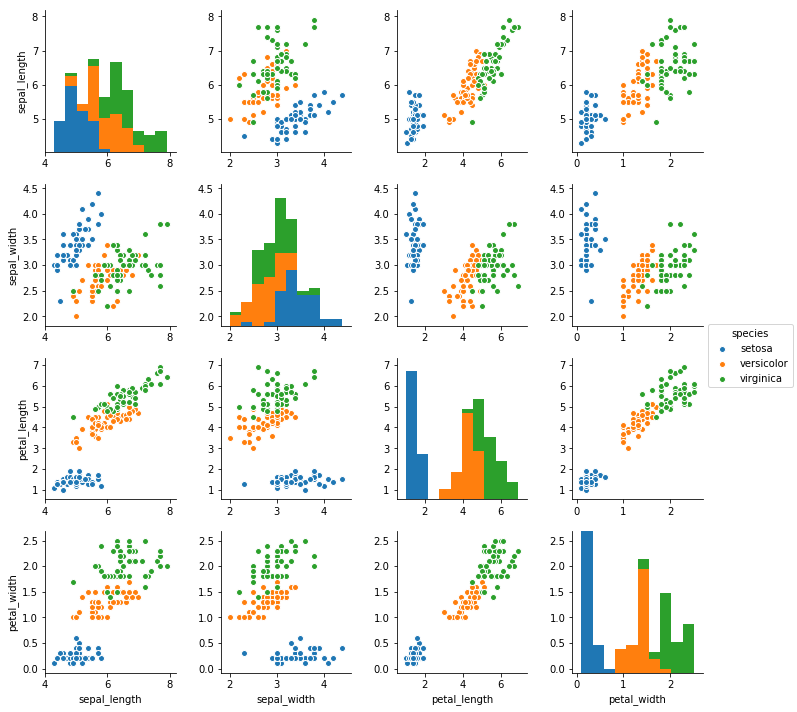

In [124]:
sns.pairplot(iris, hue="species")

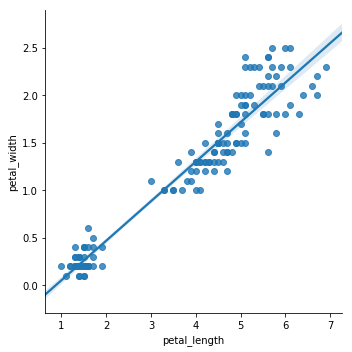

In [192]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)

In [125]:
X = iris.iloc[:, 2:4].values
y = iris['species'].values

In [187]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y) 

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [128]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [129]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [130]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

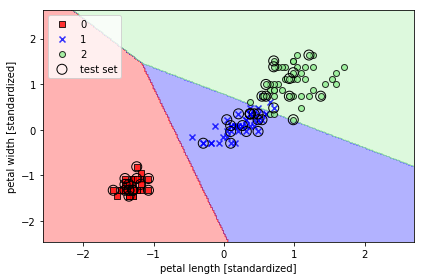

In [131]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

In [36]:
lr.predict_proba(X_test_std[:3, :])

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13]])

In [37]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([ 1.,  1.,  1.])

In [41]:
y_test[:3]

array([2, 0, 0])

In [42]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

Предсказываем класс первого наблюдения

In [43]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

На основе его коэффициентов:

In [44]:
X_test_std[0, :]

array([ 0.89820289,  1.44465434])

In [45]:
X_test_std[0, :].reshape(1, -1)

array([[ 0.89820289,  1.44465434]])

## Проблема переобучения в задаче классификации
<img src="img/overfitting.png" width="600">
<img src="img/bias_variance.png" width="450">
Смещение - это ошибка от ошибочных предположений в алгоритме обучения. Высокое смещение может привести к тому, что алгоритм упустит соответствующие отношения между функциями и целевыми выходами (underfitting).

Дисперсия - это ошибка от чувствительности к небольшим колебаниям в тренировочном наборе. Высокая дисперсия может привести к тому, что алгоритм моделирует случайный шум в данных обучения, а не предполагаемые выходы (overfitting).

Параметр `C` обозначает обратную силу регуляризации. Чем меньше значение, тем сильнее регуляризация.

В параметре `penalty` указывается тип регуляризации — `l2` или `l1`.

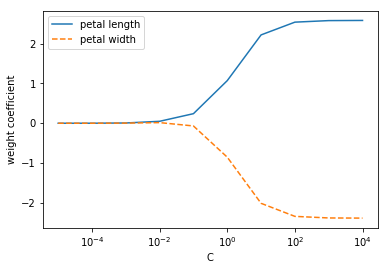

In [132]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

## Машина опорных векторов


Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, максимизирующая расстояние до двух параллельных гиперплоскостей. Алгоритм работает в предположении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.

На практике случаи, когда данные можно разделить гиперплоскостью, довольно редки. В этом случае поступают так: все элементы обучающей выборки вкладываются в пространство X более высокой размерности, так, чтобы выборка была линейно разделима.

https://www.youtube.com/embed/3liCbRZPrZA

In [133]:
from sklearn.svm import SVC

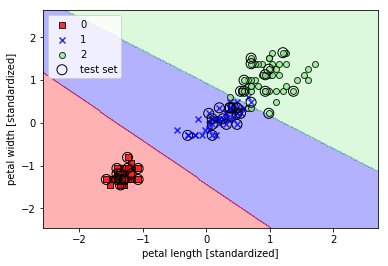

In [134]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

<img src="img/svm_nonlin.png" width="600">

Kernel (ядро) отвечается за гиперплоскость и может принимать значения linear (для линейной), rbf (для нелинейной) и другие. 

С - параметр регуляризации. Он в том числе контролирует соотношение между гладкой границей и корректной классификацией рассматриваемых точек.

gamma - это «ширина» rbf ядра (kernel). Она участвует в подгонке модели и может являться причиной переобучения.

## Нелинейная классификация

<img src="img/svm_nonlin2.png" width="600">

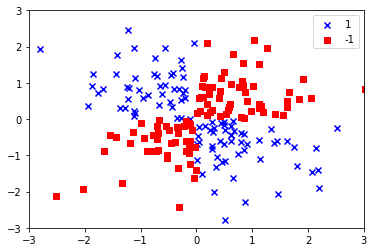

In [63]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')

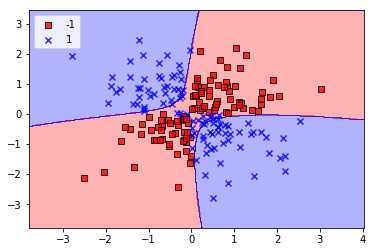

In [64]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')

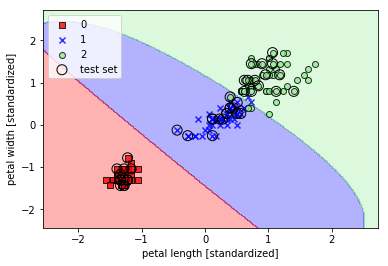

In [65]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

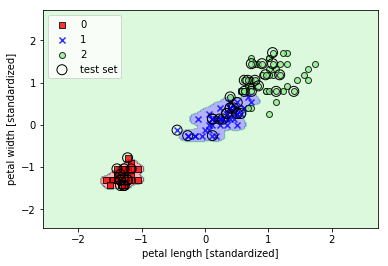

In [66]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

## Деревья решений
Деревья решений используются в повседневной жизни в самых разных областях человеческой деятельности, порой и очень далеких от машинного обучения. Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации.

Зачастую дерево решений служит обобщением опыта экспертов, средством передачи знаний будущим сотрудникам или моделью бизнес-процесса компании. Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых интуитивно (или по опыту) выведенных правил, которые можно представить в виде дерева решений:
<img src="img/dec_tree.gif">

В этом случае можно сказать, что решается задача бинарной классификации (целевой класс имеет два значения: "Выдать кредит" и "Отказать") по признакам "Возраст", "Наличие дома", "Доход" и "Образование".

Дерево решений как алгоритм машинного обучения – по сути то же самое: объединение логических правил вида "Значение признака a меньше x И Значение признака b меньше y… => Класс 1" в структуру данных "Дерево". Огромное преимущество деревьев решений в том, что они легко интерпретируемы, понятны человеку. Например, по схеме на рисунке выше можно объяснить заемщику, почему ему было отказано в кредите. Скажем, потому, что у него нет дома и доход меньше 5000. Как мы увидим дальше, многие другие, хоть и более точные, модели не обладают этим свойством и могут рассматриваться скорее как "черный ящик", в который загрузили данные и получили ответ. В связи с этой "понятностью" деревьев решений и их сходством с моделью принятия решений человеком (можно легко объяснять боссу свою модель), деревья решений получили огромную популярность

В основе популярных алгоритмов построения дерева решений лежит принцип жадной максимизации прироста информации – на каждом шаге выбирается тот признак, при разделении по которому прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине (если дерево не подгоняется идеально под обучающую выборку во избежание переобучения).
В разных алгоритмах применяются разные эвристики для "ранней остановки" или "отсечения", чтобы избежать построения переобученного дерева.

Плюсы:

* Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите". Это свойство называют интерпретируемостью модели;
* Деревья решений могут легко визуализироваться, как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);
* Быстрые процессы обучения и прогнозирования;
* Малое число параметров модели;
* Поддержка и числовых, и категориальных признаков.

Минусы:

* У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели;
* Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам;
* Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение — проблема всех методов машинного обучения;
* Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее);
* Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку) NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева;
* Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло около 50% кода CART (классический алгоритм построения деревьев классификации и регрессии – Classification And Regression Trees, в sklearn реализована улучшенная версия именно этого алгоритма);
* Модель умеет только интерполировать, но не экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.

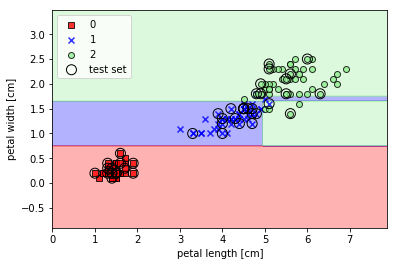

In [111]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')


In [135]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('img/tree.png')

True

<img src="img/tree.png" width="500">

## Метод ближайших соседей
Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки
* Отобрать k объектов обучающей выборки, расстояние до которых минимально
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

Под задачу регрессии метод адаптируется довольно легко – на 3 шаге возвращается не метка, а число – среднее (или медианное) значение целевого признака среди соседей.

Примечательное свойство такого подхода – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при наличии обучающих примеров, никакая модель не строится. В этом отличие, например, от ранее рассмотренного дерева решений, где сначала на основе обучающей выборки строится дерево, а потом относительно быстро происходит классификация тестовых примеров.


**Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров**:

* число соседей
* метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

**Плюсы и минусы метода ближайших соседей**

Плюсы:

* Простая реализация;
* Неплохо изучен теоретически;
* Как правило, метод хорош для первого решения задачи;
* Можно адаптировать под нужную задачу выбором метрики или ядра (ядро может задавать операцию сходства для сложных объектов типа графов, а сам подход kNN остается тем же);
* Неплохая интерпретация, можно объяснить, почему тестовый пример был классифицирован именно так.

Минусы:

* Метод считается быстрым в сравнении, например, с композициями алгоритмов, но в реальных задачах, как правило, число соседей, используемых для классификации, будет большим (100-150), и в таком случае алгоритм будет работать не так быстро, как дерево решений;
* Если в наборе данных много признаков, то трудно подобрать подходящие веса и определить, какие признаки не важны для классификации/регрессии;
* Зависимость от выбранной метрики расстояния между примерами. Выбор по умолчанию евклидового расстояния чаще всего ничем не обоснован. Можно отыскать хорошее решение перебором параметров, но для большого набора данных это отнимает много времени;
* Нет теоретических оснований выбора определенного числа соседей — только перебор (впрочем, чаще всего это верно для всех гиперпараметров всех моделей). В случае малого числа соседей метод чувствителен к выбросам, то есть склонен переобучаться;
* Как правило, плохо работает, когда признаков много, из-за "прояклятия размерности". Про это хорошо рассказывает известный в ML-сообществе профессор Pedro Domingos – тут в популярной статье "A Few Useful Things to Know about Machine Learning", также "the curse of dimensionality" описывается в книге Deep Learning в главе "Machine Learning basics".

### Класс KNeighborsClassifier в Scikit-learn

Основные параметры класса sklearn.neighbors.KNeighborsClassifier:

* weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
* algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
* leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие



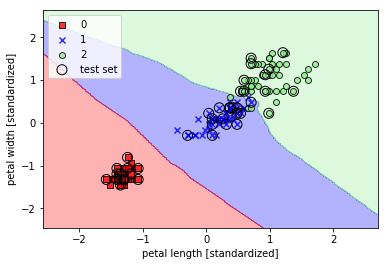

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

# Самостоятельная работа

Примените изученные классификаторы для предсказания выживаемости на Титанике и постойте наилучший классификатор. Каковы значения основных его метрик?

Опирайтесь на эти статьи:
* [Kaggle и Titanic — еще одно решение задачи с помощью Python](https://habrahabr.ru/post/274171/)
* [Основы анализа данных на python с использованием pandas+sklearn](https://habrahabr.ru/post/202090/)
* [Титаник на Kaggle: вы не дочитаете этот пост до конца](https://habrahabr.ru/company/mlclass/blog/270973/)